In [31]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [32]:
df = pd.read_csv("Задания/Datasets/airportdat.txt", delim_whitespace=True, header=None, on_bad_lines='skip')
df.columns = ['Airport', 'TypeOfAirport', 'City', 'ScheduledDepartures', 'PerformedDepartures', 'EnplanedPassengers', 'TonsOfFreight', 'TonsOfMail']
print(df.shape)
df.head(20)

(76, 8)


/var/folders/19/c1rn4t0n4qn2h0cjhj9f9_3r0000gn/T/ipykernel_85021/1713613522.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("Задания/Datasets/airportdat.txt", delim_whitespace=True, header=None, on_bad_lines='skip')


,Airport,TypeOfAirport,City,ScheduledDepartures,PerformedDepartures,EnplanedPassengers,TonsOfFreight,TonsOfMail
0,HARTSFIELD,INTL,ATLANTA,285693,288803,22665665.00,165668.76,93039.48
1,BALTO/WASH,INTL,BALTIMORE,73300,74048,4420425.00,18041.52,19722.93
2,LOGAN,INTL,BOSTON,114153,115524,9549585.00,127815.09,29785.72
3,DOUGLAS,MUNI,CHARLOTTE,120210,121798,7076954.00,36242.84,15399.46
4,OHARE,INTL,CHICAGO,322430,332338,25636383.00,300463.80,140359.38
5,STAPLETON,INTL,DENVER,154067,156293,11961839.00,67345.75,38043.73
6,DETROIT,CITY,DETROIT,6828,7162,362655.00,258.08,0.00
7,WAYNE,COUNTY,DETROIT,134929,137565,9903078.00,42831.24,32429.74
8,WILLOW,RUN,DETROIT,4241,4024,35.00,33858.26,1249.00
9,HONOLULU,INTL,HONOLULU,92659,96780,9002217.00,139496.57,19951.37


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Airport              76 non-null     object 
 1   TypeOfAirport        76 non-null     object 
 2   City                 76 non-null     object 
 3   ScheduledDepartures  76 non-null     int64  
 4   PerformedDepartures  76 non-null     int64  
 5   EnplanedPassengers   76 non-null     float64
 6   TonsOfFreight        76 non-null     float64
 7   TonsOfMail           60 non-null     float64
dtypes: float64(3), int64(2), object(3)
memory usage: 4.9+ KB


In [34]:
df.isnull().sum()

Airport                 0
TypeOfAirport           0
City                    0
ScheduledDepartures     0
PerformedDepartures     0
EnplanedPassengers      0
TonsOfFreight           0
TonsOfMail             16
dtype: int64

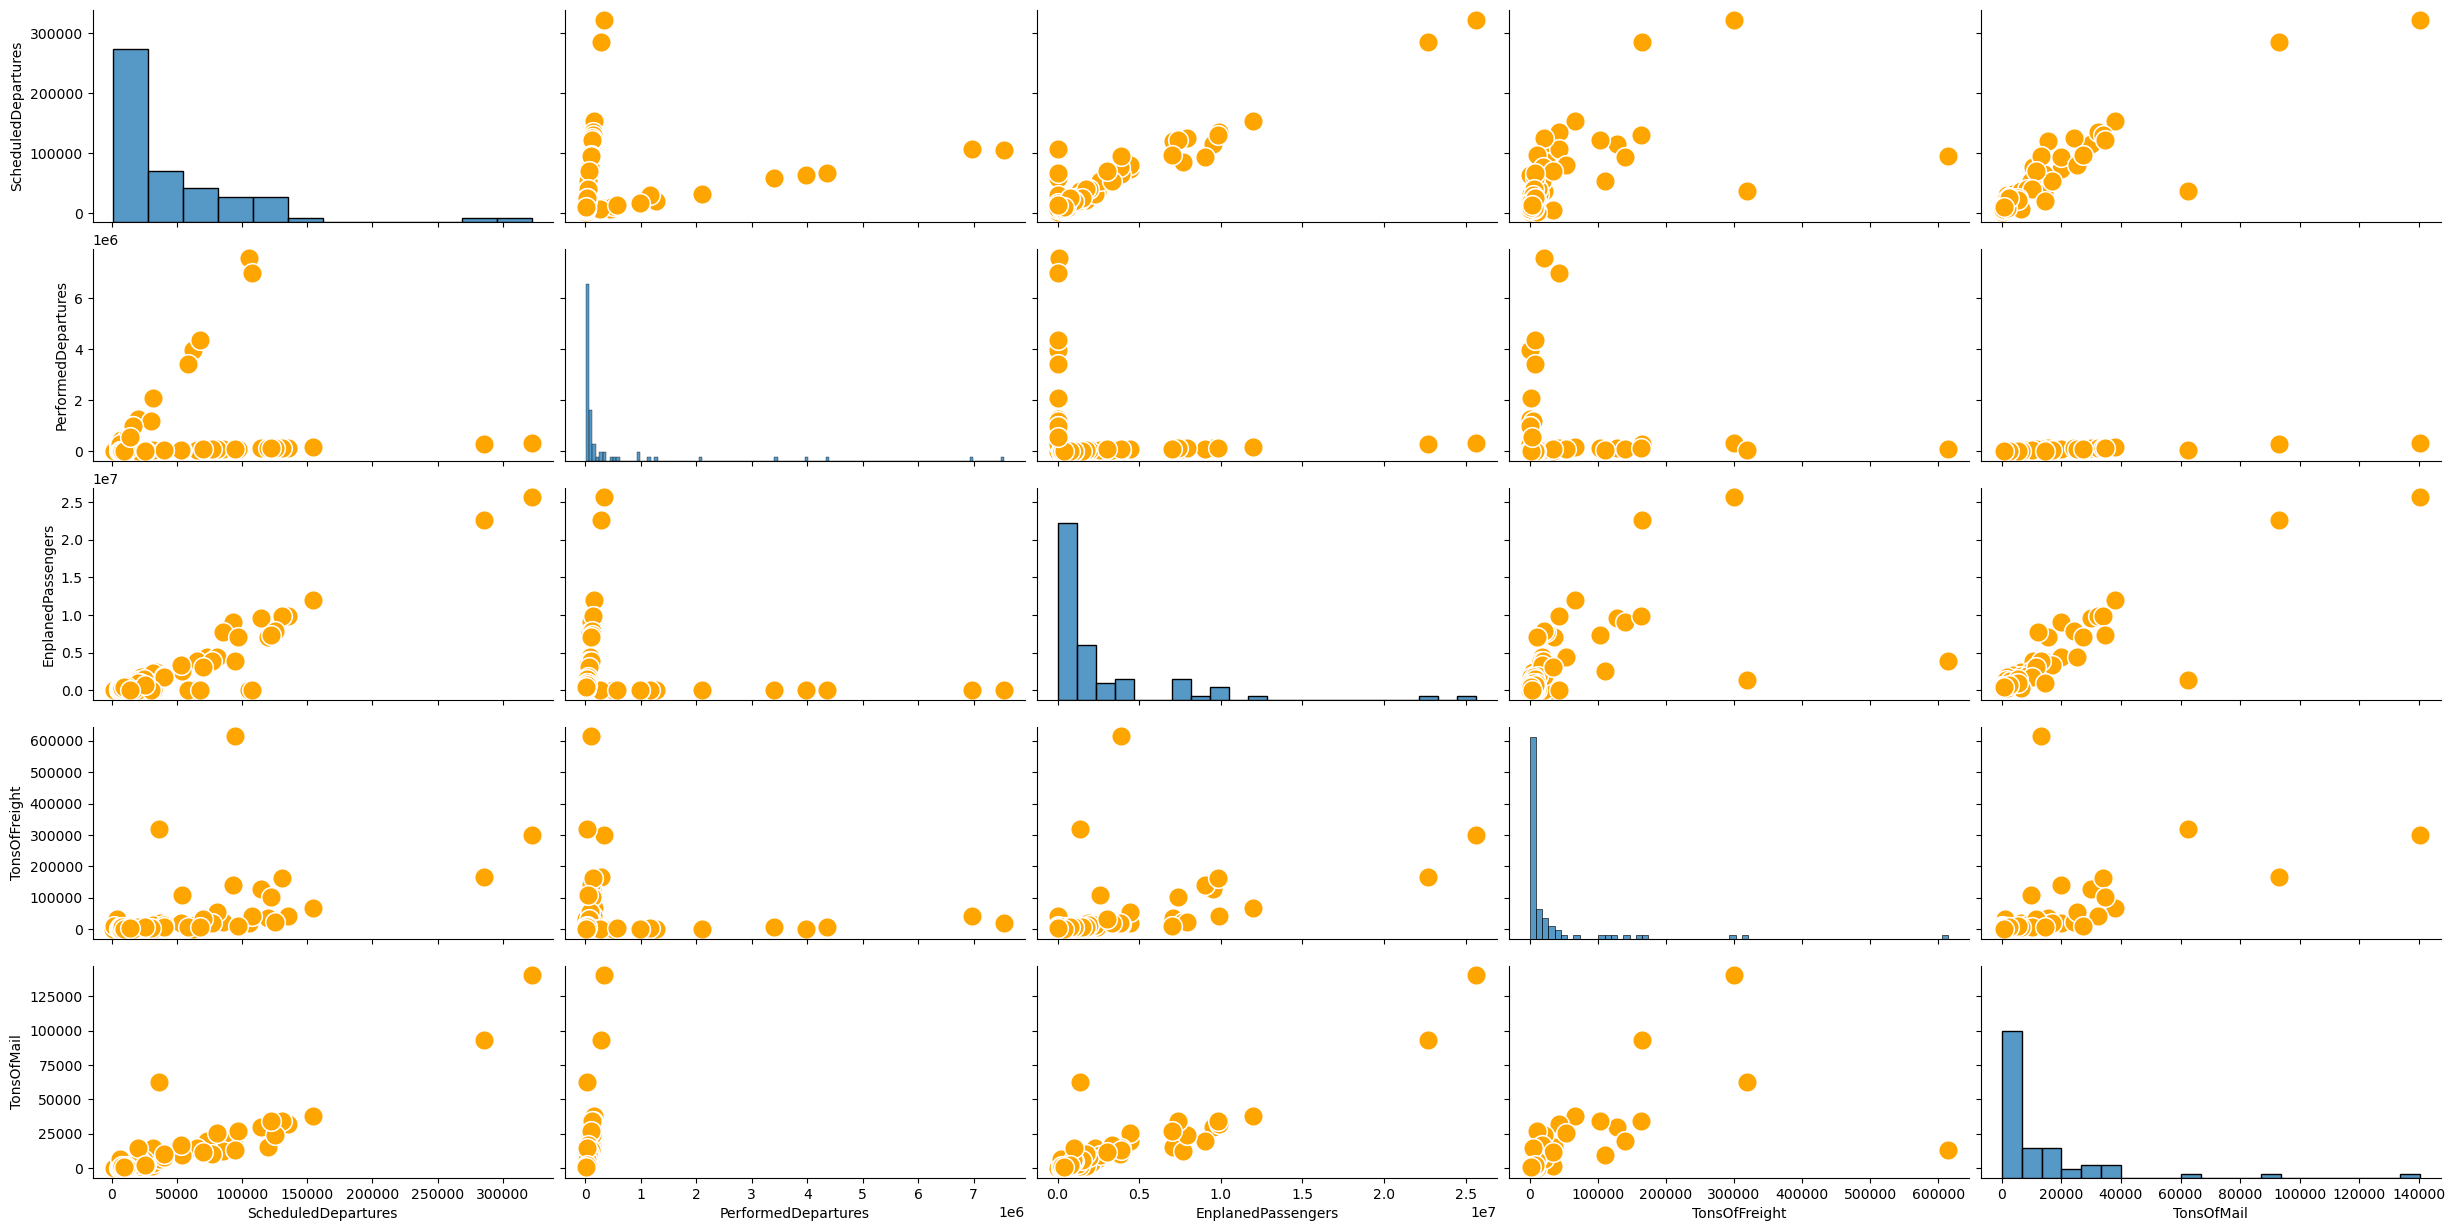

In [35]:
sns.pairplot(df, plot_kws={'color': 'orange', 's': 200}, aspect = 2)  
# aspect — соотношение ширины к высоте
# s — размер точки
plt.show()

<Axes: >

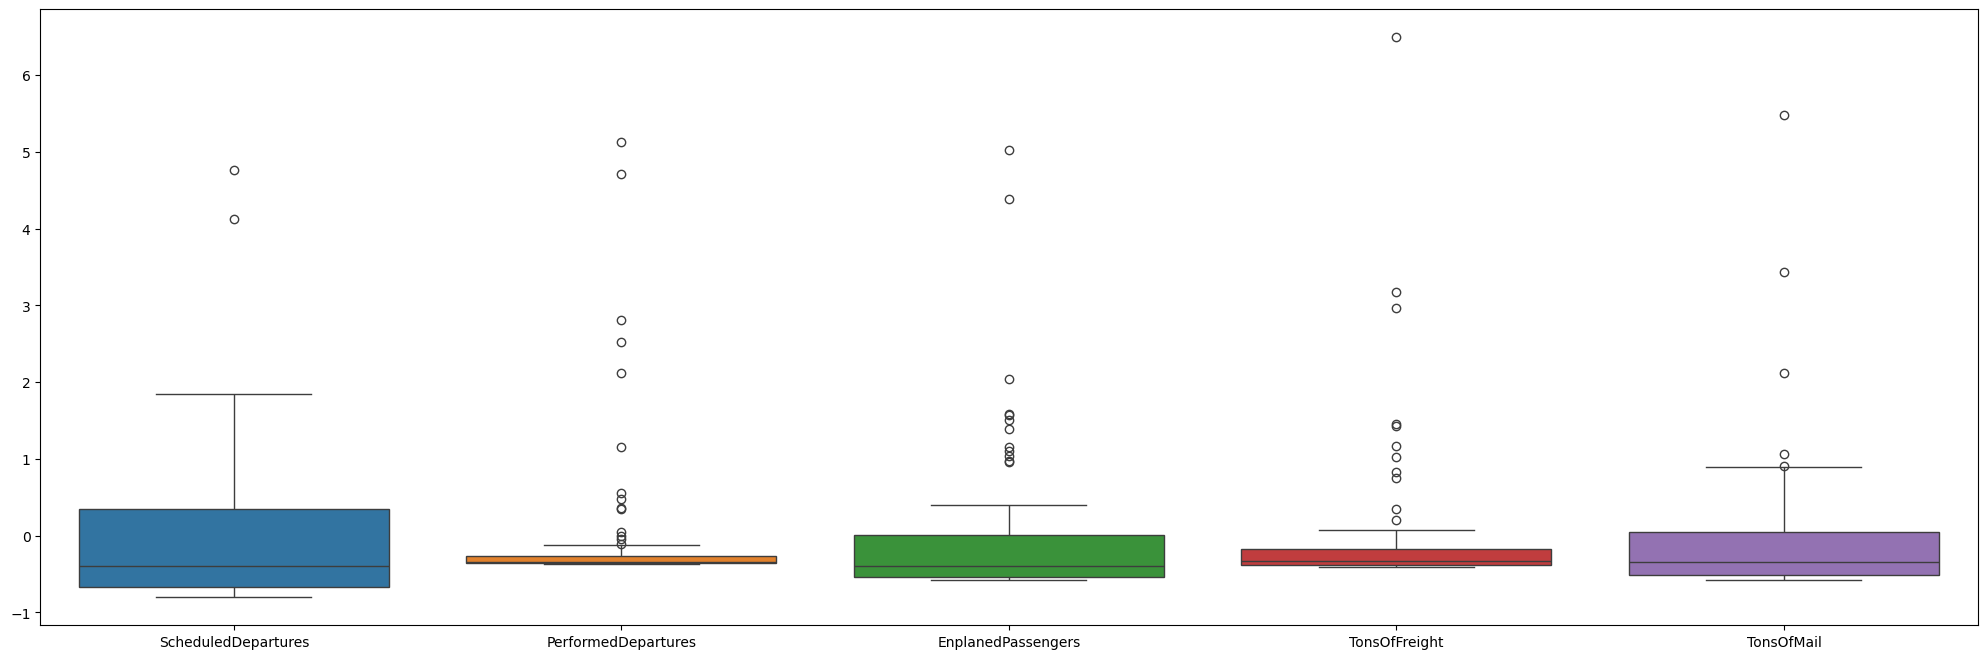

In [36]:
feature_columnas = ['Airport', 'TypeOfAirport', 'City']

data = df.copy()

data = data.drop(feature_columnas, axis=1)


scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Convert the scaled data back to a DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

plt.figure(1, figsize=(25, 8))  # Increase the height of the heatmap
sns.boxplot(data_scaled)

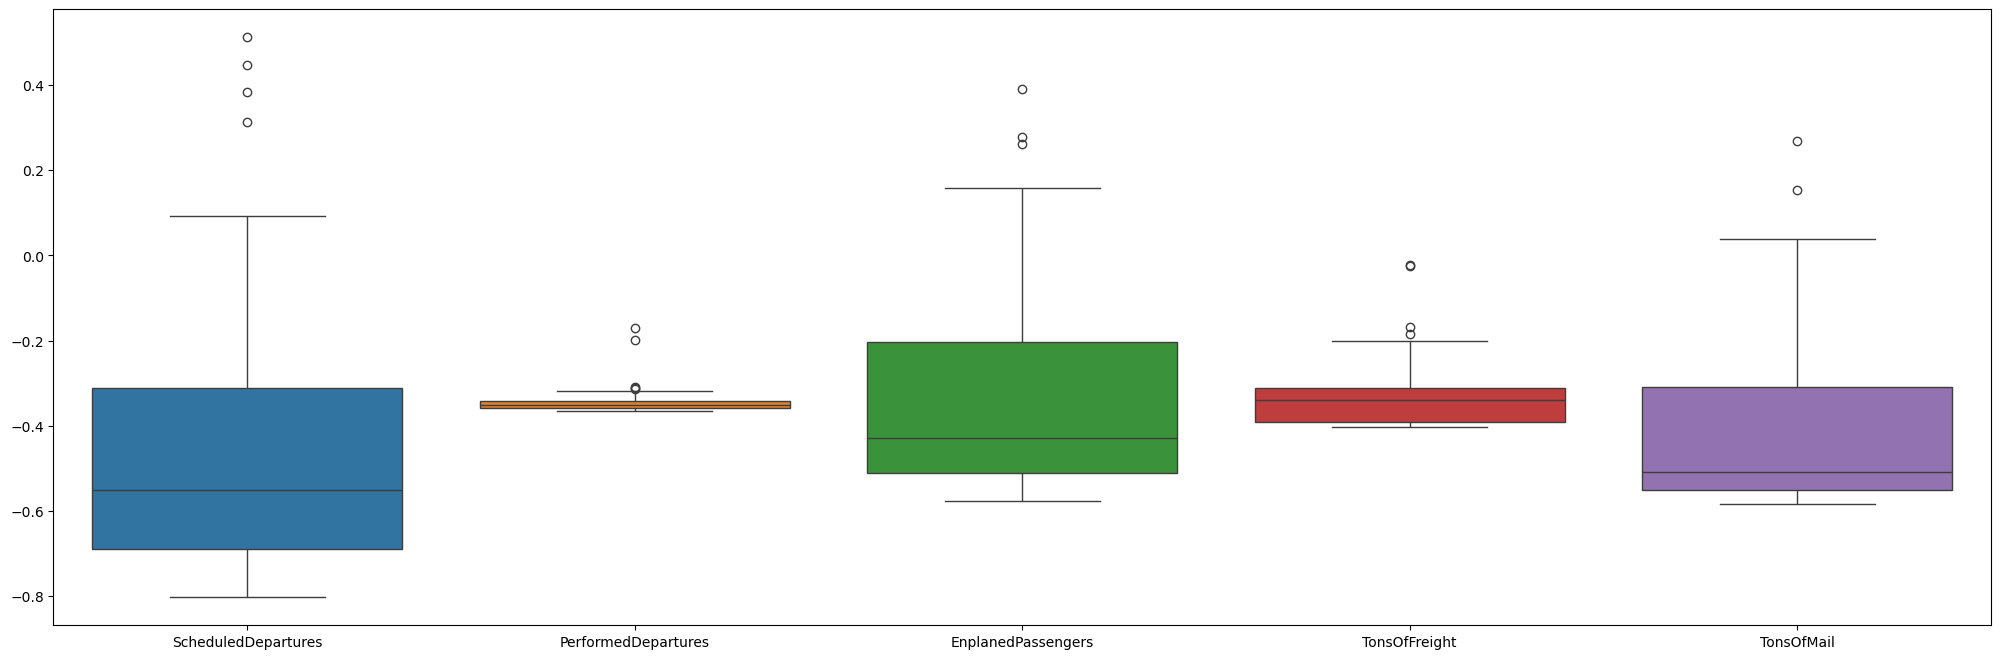

In [37]:
# Масштабирование данных
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Преобразование обратно в DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

# Функция для удаления выбросов с помощью IQR
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# Удаление выбросов
data_no_outliers = remove_outliers_iqr(data_scaled)

# Построение boxplot без выбросов
plt.figure(figsize=(25, 8))
sns.boxplot(data=data_no_outliers)
plt.show()

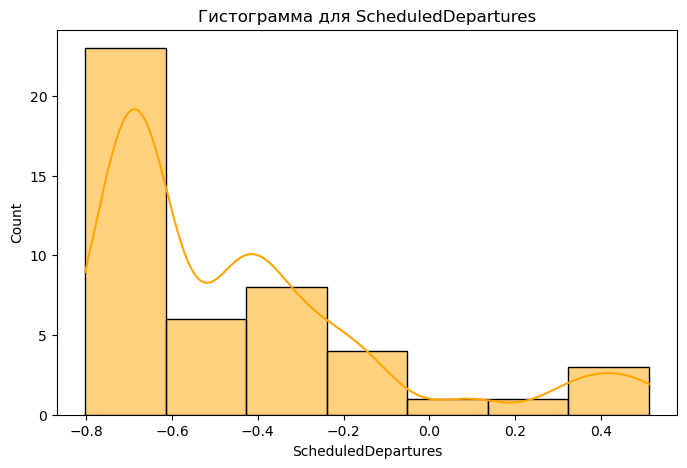

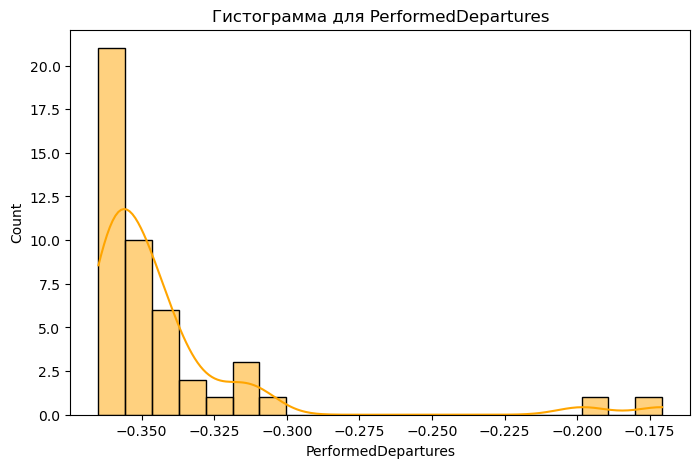

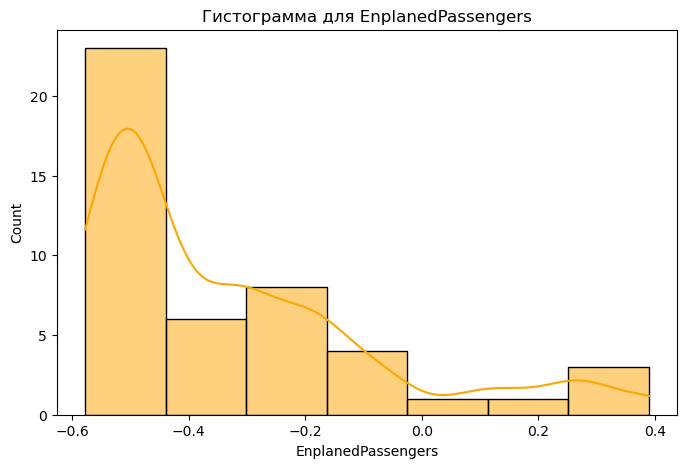

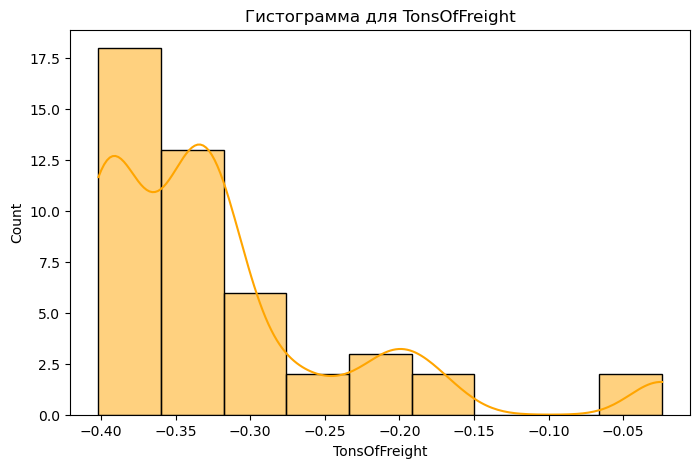

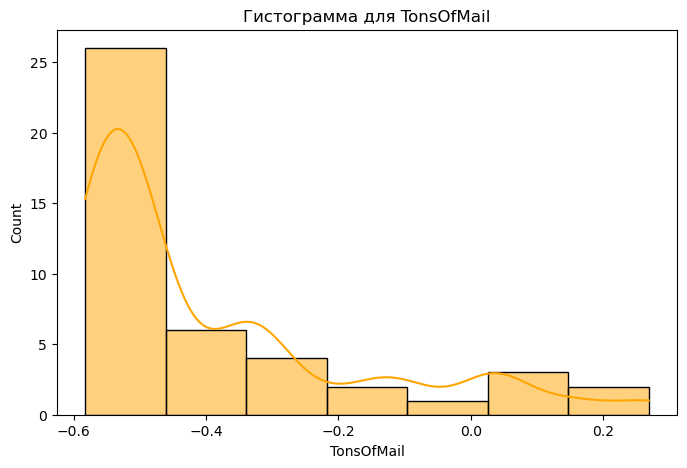

In [38]:
for column in data.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data_no_outliers[column], kde=True, color='orange',kde_kws={'bw_adjust': 0.5})  
    # kde=True добавляет линию плотности
    # dw_adjust настраивает уровень сглаживания kde
    plt.title(f'Гистограмма для {column}')
    plt.show()

    Что касается видов распределения:

По файлу image1.png, в таком случае:
- ['ScheduledDepartures', 'PerformedDepartures', 'EnplanedPassengers', 'TonsOfFreight', 'TonsOfMail']
- 'ScheduledDepartures' имеет распределение Вейбулла
- 'PerformedDepartures' имеет логнормальное распределение
- 'EnplanedPassengers' имеет логнормальное распределение
- 'TonsOfFreight' имеет многовершинное распределение
- 'TonsOfMail' имеет распределение Пуассона

По файлу image2.png, в таком случае:
- ['ScheduledDepartures', 'PerformedDepartures', 'EnplanedPassengers', 'TonsOfFreight', 'TonsOfMail']
- 'ScheduledDepartures' имеет умеренно-скошенное распределение
- 'PerformedDepartures' имеет умеренно-скошенное распределение                  
- 'EnplanedPassengers' имеет умеренно-скошенное распределение
- 'TonsOfFreight' имеет многовершинное распределение
- 'TonsOfMail' имеет умеренно-скошенное распределение

In [39]:
print(df.describe())
df.describe(include=['O'])

       ScheduledDepartures  PerformedDepartures  EnplanedPassengers  \
count            76.000000         7.600000e+01        7.600000e+01   
mean          47475.605263         5.024672e+05        2.639805e+06   
std           58065.279348         1.382716e+06        4.602265e+06   
min            1188.000000         1.253000e+03        0.000000e+00   
25%            9104.000000         1.113900e+04        1.806761e+05   
50%           25053.500000         3.892600e+04        8.424870e+05   
75%           67872.500000         1.422470e+05        2.707716e+06   
max          322430.000000         7.543899e+06        2.563638e+07   

       TonsOfFreight     TonsOfMail  
count      76.000000      60.000000  
mean    35986.601579   13489.597000  
std     89661.439008   23346.124811  
min        71.360000       0.000000  
25%      1446.042500    1515.080000  
50%      6493.900000    5496.905000  
75%     20960.532500   14643.227500  
max    614223.600000  140359.380000  


,Airport,TypeOfAirport,City
count,76,76,76
unique,73,38,73
top,LOGAN,INTL,DETROIT
freq,2,25,3


# Статистические характеристики

1. **Выборочное среднее (Mean)**:
   $$\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$$
   - Это среднее значение выборки, которое вычисляется как сумма всех наблюдений, деленная на их количество. Оно представляет собой центр данных.

2. **Выборочная дисперсия (Sample Variance)**:
   $$s^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2$$
   - Дисперсия измеряет, насколько сильно данные отклоняются от своего среднего значения. Чем больше дисперсия, тем больше разброс значений.

3. **Стандартное отклонение (Standard Deviation)**:
   $$s = \sqrt{s^2}$$
   - Это квадратный корень из дисперсии, который также измеряет разброс данных, но в тех же единицах, что и сами данные. Оно помогает понять, насколько значения выборки в среднем отклоняются от среднего.

4. **Медиана (Median)**:
   - Медиана — это значение, которое делит отсортированный набор данных на две равные части. Если количество наблюдений четное, то медианой будет среднее двух центральных значений. Она менее чувствительна к выбросам по сравнению со средним.

5. **1-й и 3-й квартили (Q1 и Q3)**:
   - $Q1$ — это медиана первой половины данных (25-й процентиль), указывающая на значение, ниже которого находится 25% наблюдений.
   - $Q3$ — медиана второй половины данных (75-й процентиль), указывающая на значение, ниже которого находится 75% наблюдений. Квартильный размах (IQR) определяется как $IQR = Q3 - Q1$ и помогает выявлять выбросы.

6. **Попарные коэффициенты корреляции (Pairwise Correlation Coefficients)**:
   $$r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2} \sqrt{\sum (y_i - \bar{y})^2}}$$
   - Этот коэффициент измеряет степень линейной связи между двумя переменными. Значения колеблются от -1 до 1, где 1 означает полную положительную корреляцию, -1 — полную отрицательную, а 0 — отсутствие корреляции.

In [40]:
# 1. Выборочное среднее
mean = data.mean()

# 2. Выборочная дисперсия
sample_variance = data.var(ddof=1)  # ddof=1 для выборочной дисперсии

# 3. Стандартное отклонение
standard_deviation = data.std(ddof=1)  # ddof=1 для выборочного стандартного отклонения

# 4. Медиана
median = data.median()

# 5. 1-й и 3-й квартили
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

# 6. Попарные коэффициенты корреляции
correlation = data.corr()

# Вывод результатов
print("Выборочное среднее:\n", mean)
print("\nВыборочная дисперсия:\n", sample_variance)
print("\nСтандартное отклонение:\n", standard_deviation)
print("\nМедиана:\n", median)
print("\n1-й квартили (Q1):\n", Q1)
print("\n3-й квартили (Q3):\n", Q3)
print("\nПопарные коэффициенты корреляции:\n", correlation)

Выборочное среднее:
 ScheduledDepartures    4.747561e+04
PerformedDepartures    5.024672e+05
EnplanedPassengers     2.639805e+06
TonsOfFreight          3.598660e+04
TonsOfMail             1.348960e+04
dtype: float64

Выборочная дисперсия:
 ScheduledDepartures    3.371577e+09
PerformedDepartures    1.911902e+12
EnplanedPassengers     2.118085e+13
TonsOfFreight          8.039174e+09
TonsOfMail             5.450415e+08
dtype: float64

Стандартное отклонение:
 ScheduledDepartures    5.806528e+04
PerformedDepartures    1.382716e+06
EnplanedPassengers     4.602265e+06
TonsOfFreight          8.966144e+04
TonsOfMail             2.334612e+04
dtype: float64

Медиана:
 ScheduledDepartures     25053.500
PerformedDepartures     38926.000
EnplanedPassengers     842487.000
TonsOfFreight            6493.900
TonsOfMail               5496.905
dtype: float64

1-й квартили (Q1):
 ScheduledDepartures      9104.0000
PerformedDepartures     11139.0000
EnplanedPassengers     180676.0900
TonsOfFreight         